In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
election_data = pd.read_csv("data/data.csv")
election_data.keys

election_data[" Harris Percent"]

0       26.3
1       20.4
2       42.2
3       17.5
4        9.1
        ... 
4625    22.3
4626    65.8
4627    17.2
4628    16.9
4629    10.8
Name:  Harris Percent, Length: 4630, dtype: float64

In [ ]:
# Removing leading/trailing whitespace
election_data.columns = election_data.columns.str.strip()

# Define Aggregation Functions
agg_funcs = [
    'count',        # Number of counties reporting
    'mean',         # Average county percentage
    'median',       # Median county percentage
    'std',          # Standard deviation (spread)
    'var',          # Variance (spread squared)
    'min',          # Minimum county percentage
    'max',          # Maximum county percentage
    'sem',          # Standard error of the mean
    'skew',         # Skewness of distribution
    #'kurt',         # Kurtosis (tailedness) of distribution TODO figure out why this isn't working
    lambda x: x.quantile(0.25), # 1st Quartile (25th percentile)
    lambda x: x.quantile(0.75)  # 3rd Quartile (75th percentile)
]
# Rename the lambda functions for clearer column names in the output
agg_funcs[-2].__name__ = '25%' # Q1
agg_funcs[-1].__name__ = '75%' # Q3


# Perform Groupby and Aggregation
# Group by 'State' and apply the defined functions to the percentage columns
# Using a dictionary maps the functions to the specific columns
state_aggregated_stats = election_data.groupby('State').agg({
    'Trump Percent': agg_funcs,
    'Harris Percent': agg_funcs
})

In [62]:
state_aggregated_stats

Trump Percent                                           \
                             count       mean median        std         var   
State                                                                         
Alabama                         67  67.407463  72.80  19.383790  375.731307   
Alaska                          40  53.537500  50.20  12.779184  163.307532   
Arizona                         15  58.640000  60.60  13.209942  174.502571   
Arkansas                        75  71.305333  74.90  11.788358  138.965377   
California                      58  46.998276  49.50  14.911358  222.348593   
Colorado                        64  56.506250  55.65  18.556271  344.335198   
Connecticut                    168  45.807738  46.80  10.738938  115.324790   
Delaware                         3  45.333333  48.20  11.276672  127.163333   
District-of-columbia             8   6.450000   6.25   1.195229    1.428571   
Florida                         67  66.747761  68.60  12.813633  164.189199   
Georgia                        159  65.681761  70.00  15.979215  255.335298   
Hawaii                           4  37.075000  37.15   2.101388    4.415833   
Idaho                           44  74.906818  77.45  11.446222  131.015999   
Illinois                       102  66.674510  70.00  12.018729  144.449839   
Indiana                         92  70.057609  74.10   9.652799   93.176535   
Iowa                            99  66.322222  68.00   9.029425   81.530522   
Kansas                         105  76.074286  79.80  10.970564  120.353275   
Kentucky                       120  76.335833  78.50   9.220755   85.022319   
Louisiana                       64  66.806250  67.50  14.247304  202.985675   
Maine                          497  54.054728  57.80  17.267251  298.157967   
Maryland                        24  48.966667  55.10  17.682850  312.683188   
Massachusetts                  351  38.450712  39.40  12.634096  159.620392   
Michigan                        83  60.893976  63.70   9.726659   94.607890   
Minnesota                       87  61.844828  64.70  10.301589  106.122735   
Mississippi                     82  59.228049  61.35  18.822631  354.291426   
Missouri                       115  76.498261  79.70  10.704795  114.592629   
Montana                         56  70.051786  73.10  13.614471  185.353815   
Nebraska                        93  79.535484  81.40   9.564196   91.473836   
Nevada                          17  71.070588  73.80  11.765775  138.433456   
New-Hampshire                  237  50.825316  51.60  10.853717  117.803170   
New-Jersey                      21  47.838095  50.10  10.701097  114.513476   
New-Mexico                      33  55.872727  58.30  16.022977  256.735795   
New-York                        62  54.414516  56.55  12.033026  144.793720   
North-Carolina                 100  59.762000  61.55  13.261601  175.870057   
North-Dakota                    53  74.103774  76.00  11.970620  143.295755   
Ohio                            88  69.039773  71.50  11.248004  126.517595   
Oklahoma                        77  78.544156  80.20   7.963824   63.422498   
Oregon                          36  57.002778  59.30  16.256787  264.283135   
Pennsylvania                    67  64.716418  68.70  12.637134  159.697151   
Rhode-Island                    39  43.792308  44.90  10.763813  115.859676   
South-Carolina                  46  57.054348  57.95  11.794325  139.106092   
South-Dakota                    66  68.896970  71.25  14.162007  200.562452   
Tennessee                       95  77.372632  80.50   9.855244   97.125839   
Texas                          253  77.039130  80.80  12.786976  163.506756   
Utah                            29  73.217241  77.40  13.917103  193.685764   
Vermont                        247  37.922267  37.90  12.813688  164.190600   
Virginia                       133  57.021805  60.40  17.294549  299.101415   
Washington                      39  52.525641  53.40  13.519298  182.77

In [ ]:
# Make a copy to avoid modifying the original aggregated data
plot_data = state_aggregated_stats.copy()

# Flatten the MultiIndex columns
# Joins tuple column names. IE:('Trump Percent', 'mean') into 'Trump Percent_mean'
plot_data.columns = ['_'.join(col).strip() for col in plot_data.columns.values]

# Reset the index to make 'State' a column
plot_data = plot_data.reset_index()

print(f"Columns available for plotting:\n")
for col in plot_data.columns.tolist():
    print(col)

Columns available for plotting:

State
Trump Percent_count
Trump Percent_mean
Trump Percent_median
Trump Percent_std
Trump Percent_var
Trump Percent_min
Trump Percent_max
Trump Percent_sem
Trump Percent_skew
Trump Percent_25%
Trump Percent_75%
Harris Percent_count
Harris Percent_mean
Harris Percent_median
Harris Percent_std
Harris Percent_var
Harris Percent_min
Harris Percent_max
Harris Percent_sem
Harris Percent_skew
Harris Percent_25%
Harris Percent_75%


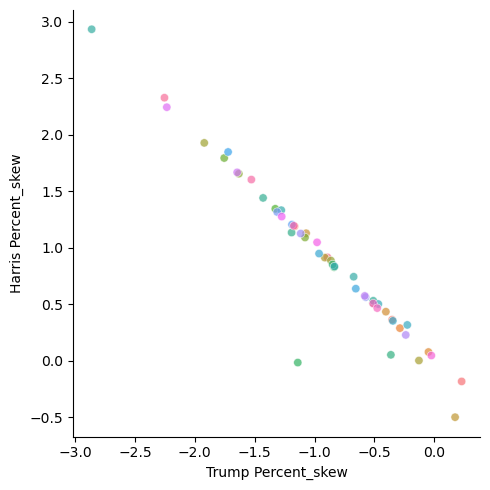

In [ ]:
var1 = 'Trump Percent_skew'
var2 = 'Harris Percent_skew'


# Check if the necessary columns exist before plotting
if all(c in plot_data.columns for c in [var1, var2]):
    sns.relplot(
        data=plot_data,
        x=var1,
        y=var2,
        hue="State",
        alpha=0.7,
        legend=False
    )
    plt.show()
else:
    print(f"\nSkipping {var1} vs {var2} plot - required columns missing.")